In [1]:
import pandas as pd

In [2]:
legitimate_urls = pd.read_csv("C:/Users/suchi/majorr/csv_files/legitimate-urls.csv")
phishing_urls = pd.read_csv("C:/Users/suchi/majorr/csv_files/phishing-urls.csv")

In [3]:
legitimate_urls.head(10)
phishing_urls.head(10)

,Protocol,Domain,Path,Having_IP,URL_Length,Having_@_symbol,Redirection_//_symbol,Prefix_suffix_separation,Sub_domains,tiny_url,web_traffic,domain_registration_length,dns_record,statistical_report,age_domain,http_tokens,label
0,http,asesoresvelfit.com,/media/datacredito.co/,0,0,0,0,0,0,1,1,1,1,0,1,0,1
1,http,caixa.com.br.fgtsagendesaqueconta.com,/consulta8523211/principal.php,0,1,0,0,0,1,0,1,1,1,1,1,0,1
2,http,hissoulreason.com,/js/homepage/home/,0,0,0,0,0,0,0,1,1,1,1,1,0,1
3,http,unauthorizd.newebpage.com,/webapps/66fbf/,0,0,0,0,0,0,0,1,1,1,1,1,0,1
4,http,133.130.103.10,/23/,1,0,0,0,0,2,0,1,1,1,0,1,0,1
5,http,dj00.co.vu,/css/,0,2,1,0,0,0,0,0,1,1,1,1,0,1
6,http,133.130.103.10,/21/logar/,1,0,0,0,0,2,0,1,1,1,0,1,0,1
7,http,httpssicredi.esy.es,/servico/sicredi/validarclientes/mobi/index.php,0,2,0,0,0,2,0,1,1,1,1,1,1,1
8,http,gamesaty.ga,/wp-content///yh/en/,0,2,0,1,0,0,0,1,1,1,0,1,0,1
9,http,luxuryupgradepro.com,/ymailNew/ymailNew/,0,0,0,0,0,0,0,1,1,1,0,1,0,1


In [4]:
urls = legitimate_urls.append(phishing_urls)

In [5]:
urls.head(5)

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,www.liquidgeneration.com,0,0,/,0,http,0,0,0,0,0,1,0,0,0,0,2
1,www.onlineanime.org,0,0,/,0,http,0,0,0,0,0,1,0,0,1,0,1
2,www.ceres.dti.ne.jp,0,0,/~nekoi/senno/senfirst.html,0,http,0,1,0,1,0,1,0,0,0,0,0
3,www.galeon.com,0,0,/kmh/,0,http,0,0,0,0,0,0,0,0,0,0,0
4,www.fanworkrecs.com,0,0,/,0,http,0,0,0,1,1,1,0,0,1,0,1


In [6]:
urls.shape[1]

17

In [7]:
urls.columns

Index(['Domain', 'Having_@_symbol', 'Having_IP', 'Path',
       'Prefix_suffix_separation', 'Protocol', 'Redirection_//_symbol',
       'Sub_domains', 'URL_Length', 'age_domain', 'dns_record',
       'domain_registration_length', 'http_tokens', 'label',
       'statistical_report', 'tiny_url', 'web_traffic'],
      dtype='object')

In [8]:
urls = urls.drop(urls.columns[[0,3,5]],axis=1)

In [9]:
urls = urls.sample(frac=1).reset_index(drop=True)

In [10]:
urls_without_labels = urls.drop('label',axis=1)
urls_without_labels.columns
labels = urls['label']

In [11]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.30, random_state=110)

In [12]:
print(len(data_train),len(data_test),len(labels_train),len(labels_test))

1409 605 1409 605


In [13]:
labels_train.value_counts()

1    719
0    690
Name: label, dtype: int64

In [14]:
labels_test.value_counts()

0    327
1    278
Name: label, dtype: int64

In [15]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()

In [16]:
random_forest_classifier.fit(data_train,labels_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
prediction_label = random_forest_classifier.predict(data_test)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
cpnfusionMatrix = confusion_matrix(labels_test,prediction_label)
print(cpnfusionMatrix)
accuracy_score(labels_test,prediction_label)

[[315  12]
 [  0 278]]


0.9801652892561984

indices of columns : [ 7  6 10 12  8  5  2 11  4  0  1  9  3]

 Label ranking 

Feature name : Importance
1 dns_record   :  0.6116619557332468 

2 age_domain   :  0.1566993561294639 

3 statistical_report   :  0.05610833569428212 

4 web_traffic   :  0.05085740232188222 

5 domain_registration_length   :  0.04971866047326551 

6 URL_Length   :  0.04630797973294795 

7 Prefix_suffix_separation   :  0.012583701581513403 

8 tiny_url   :  0.006920722527039055 

9 Sub_domains   :  0.005171932963631005 

10 Having_@_symbol   :  0.0023420147341199965 

11 Having_IP   :  0.0009454147288891686 

12 http_tokens   :  0.0003568672993427137 

13 Redirection_//_symbol   :  0.00032565608037644043 

Label Importance


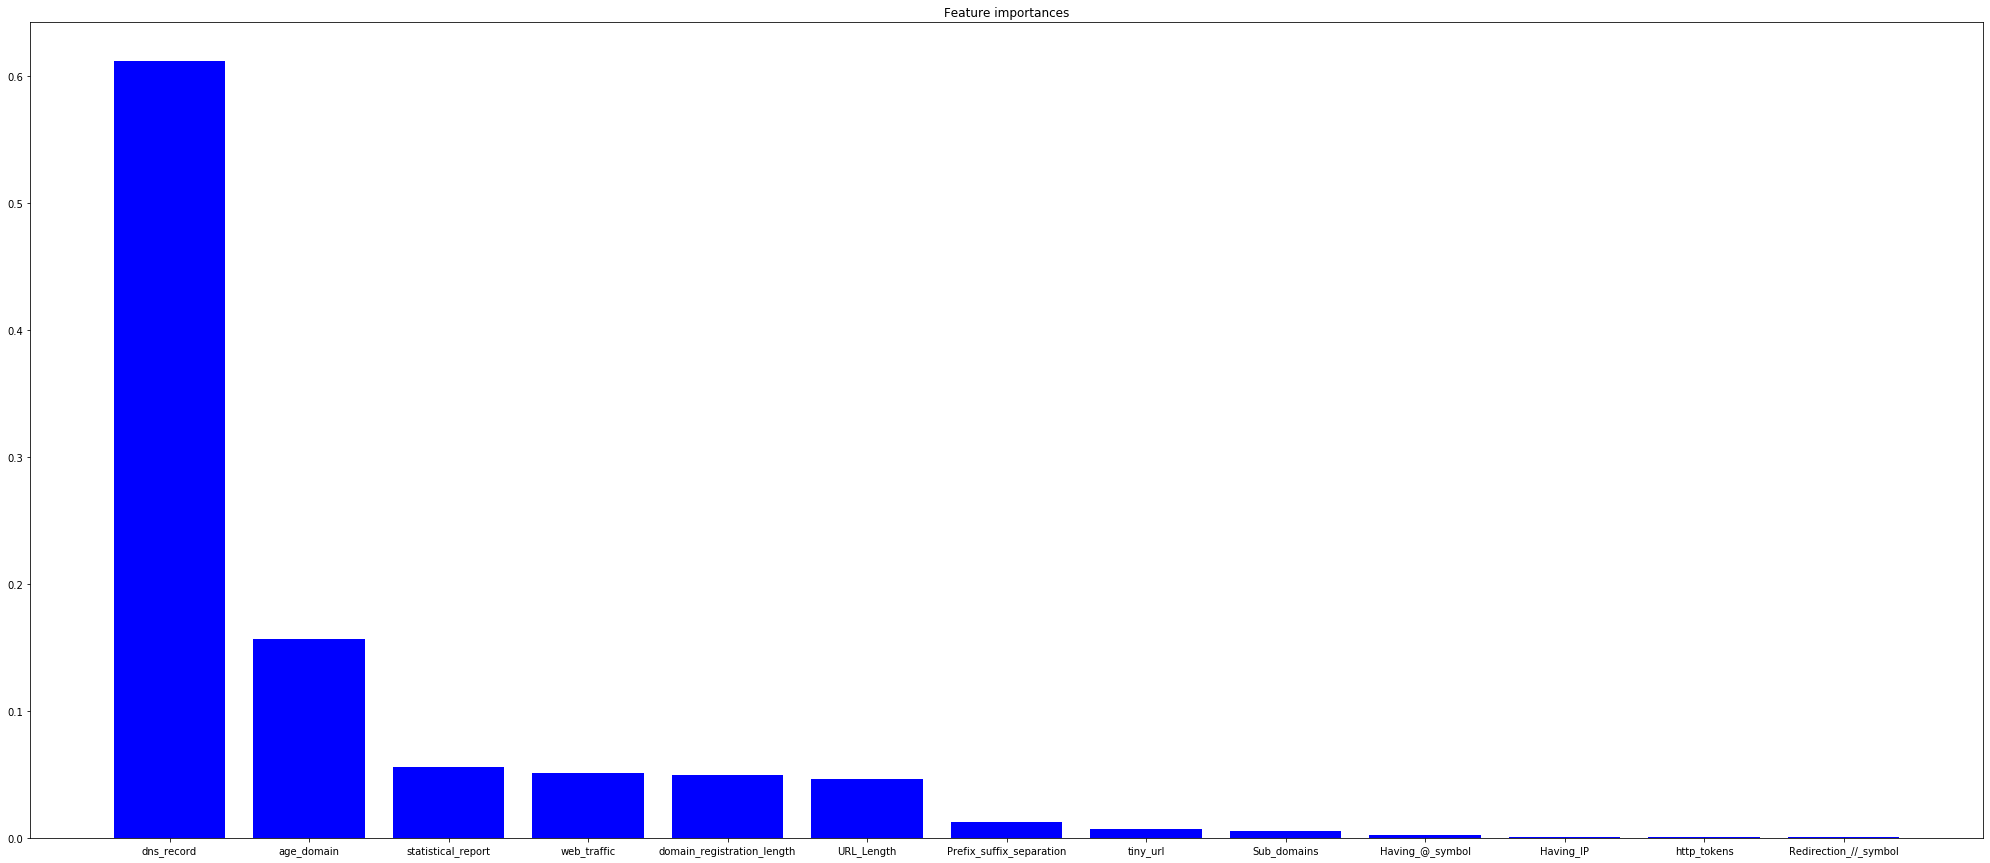

In [20]:
import matplotlib.pyplot as plt
import numpy as np
importances = random_forest_classifier.feature_importances_
indices = np.argsort(importances)[::-1] 
print(f"indices of columns : {indices}")
print("\n Label ranking \n")
print("Feature name : Importance")
for f in range(data_train.shape[1]):
    print(f"{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} \n")    
print("Label Importance")
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_train.shape[1]), importances[indices],
       color="b", align="center")   
plt.xticks(range(data_train.shape[1]), data_train.columns[indices])
plt.xlim([-1, data_train.shape[1]])
plt.rcParams['figure.figsize'] = (35,55)  
plt.show()

In [22]:
import pickle
file_name = "RandomForestModel.sav"
pickle.dump(random_forest_classifier,open(file_name,'wb'))